# 💼 Risk to Market Capital Requirement Calculation – Net Position Risk (K-NPR)

This is an example of **Risk to Market** capital requirement calculation according to the **Investment Firms Regulation (IFR)**, using the **Net Position Risk (K-NPR)** approach.

The code below performs two main calculations:

1. **Capital requirement for a European call option** with a notional value of €2,000,000, using the **Black-Scholes-Merton (BSM)** model to estimate Delta, Gamma, and Vega risks under the **standardised approach**.
2. **Capital requirements for a portfolio of financial instruments**, based on prescribed **risk weights** under the **standardised approach** in Regulation (EU) No 575/2013 (CRR).

---

## 🧮 Part 1: Capital Requirement for a European Call Option

### **Inputs:**
- Current stock price: €100  
- Strike price: €105  
- Time to maturity: 0.2 years  
- Risk-free rate: 2%  
- Volatility: 20%  
- Notional value: €2,000,000  
- Standardised equity price shock: 8%  
- Volatility shock: 25%  
- Risk weight for equity: 8%

### **Step-by-Step Calculations:**
- **Delta (Δ)**: Sensitivity to the underlying price, from BSM  
- **Gamma (Γ)**: Sensitivity of Delta to price changes (curvature)  
- **Vega (ν)**: Sensitivity to volatility changes  

The capital requirement is calculated as:
Delta Risk = |Δ × Notional| × Risk Weight
Gamma Risk = 0.5 × Γ × (Price Shock)^2 × Notional × Risk Weight
Vega Risk = ν × Vol Shock × Notional × Risk Weight
Total Option Capital = Delta Risk + Gamma Risk + Vega Risk

---

## 📊 Part 2: Capital Requirement for a Portfolio

The portfolio contains the following instruments:

| Instrument        | Notional (€) | Risk Weight      |
|-------------------|--------------|------------------|
| Equity Future     | 7,000,000    | 8%               |
| Government Bond   | 10,000,000   | 0.25%            |
| Corporate Bond    | 5,000,000    | 1.6%             |
| FX Forward        | 4,000,000    | 8%               |
| Oil Future        | 3,000,000    | 15%              |
| Equity Option     | 2,000,000    | *See BSM output* |

### **Portfolio Capital Calculation:**

For each linear position, capital is calculated as:
Capital = Notional × Risk Weight


In [10]:
import numpy as np
from scipy.stats import norm
import pandas as pd

# === PARAMETERS FOR THE EQUITY CALL OPTION ===
S = 100            # Current stock price
K = 105            # Strike price
T = 0.2            # Time to maturity (in years)
r = 0.02           # Risk-free interest rate
sigma = 0.2        # Volatility
notional = 2_000_000  # Total notional exposure
contract_size = S     # Assume 1 option covers 1 share at current price

# === BSM CALCULATIONS ===
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

delta = norm.cdf(d1)
gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
vega = S * norm.pdf(d1) * np.sqrt(T)  # Vega per 1 percentage point

# Scale to notional
delta_scaled = delta * notional
gamma_scaled = gamma * notional
vega_scaled = vega * notional

# === STANDARDISED SHOCKS ===
price_shock = 0.08       # 8% equity price shock
vol_shock = 0.25         # 25% volatility shock
risk_weight_equity = 0.08

# === CAPITAL COMPONENTS FOR THE CALL OPTION ===
delta_risk = abs(delta_scaled) * risk_weight_equity
gamma_risk = 0.5 * gamma * (price_shock ** 2) * notional * risk_weight_equity
vega_risk = vega * vol_shock * notional * risk_weight_equity

total_option_capital = delta_risk + gamma_risk + vega_risk


# === PORTFOLIO INSTRUMENTS (Name, Notional, Risk Weight) ===
portfolio = [
    {"Instrument": "Equity Future", "Notional": 7_000_000, "RW": 0.08},
    {"Instrument": "Government Bond", "Notional": 10_000_000, "RW": 0.0025},
    {"Instrument": "Corporate Bond", "Notional": 5_000_000, "RW": 0.016},
    {"Instrument": "FX Forward", "Notional": 4_000_000, "RW": 0.08},
    {"Instrument": "Oil Future", "Notional": 3_000_000, "RW": 0.15},
    {"Instrument": "Equity Option", "Notional": notional, "RW": 0.08, "Capital (€)": total_option_capital}
]

# === CALCULATE CAPITAL FOR EACH INSTRUMENT ===
for p in portfolio:
    if "Capital (€)" not in p:
        p["Capital (€)"] = p["Notional"] * p["RW"]

# === DISPLAY RESULTS ===
df = pd.DataFrame(portfolio)
df["Capital (€)"] = df["Capital (€)"].round(2)

# Add total row
total = df["Capital (€)"].sum()
total_notional = df["Notional"].sum()
df.loc[len(df.index)] = {"Instrument": "Total Capital Requirement", "Capital (€)": round(total, 2)}
df.loc[len(df.index) - 1, "Notional"] = total_notional

# Print results
print("\nStandardised Capital Requirement (Equity Option + Portfolio):")
print(df[["Instrument", "Notional", "RW", "Capital (€)"]])



Standardised Capital Requirement (Equity Option + Portfolio):
                  Instrument    Notional      RW  Capital (€)
0              Equity Future   7000000.0  0.0800    560000.00
1            Government Bond  10000000.0  0.0025     25000.00
2             Corporate Bond   5000000.0  0.0160     80000.00
3                 FX Forward   4000000.0  0.0800    320000.00
4                 Oil Future   3000000.0  0.1500    450000.00
5              Equity Option   2000000.0  0.0800    695054.67
6  Total Capital Requirement  31000000.0     NaN   2130054.67


## 📋 Summary: Standardised Capital Requirement (Equity Option + Portfolio)

Under the **Standardised Approach** defined in the **Investment Firms Regulation (IFR)**, the total **Net Position Risk (K-NPR)** capital requirement for the evaluated portfolio is:

### ✅ €2,130,054.67

This total includes capital charges for both **linear instruments** (such as futures, bonds, and forwards) and a **non-linear instrument** (the equity call option). 

The option's capital requirement was calculated using its **delta**, **gamma**, and **vega** sensitivities from the **Black-Scholes-Merton** model, combined with standardised regulatory shocks:
- **8% price shock**
- **25% volatility shock**
- **8% equity risk weight**

This approach ensures that the capital requirement reflects both market exposure and non-linear option risk.

---

In [11]:
import numpy as np
from scipy.stats import norm
import pandas as pd

# === PARAMETERS FOR THE EQUITY CALL OPTION ===
S = 100            # Current stock price
K = 105            # Strike price
T = 0.2            # Time to maturity (years)
r = 0.02           # Risk-free rate
sigma = 0.2        # Volatility
notional = 2_000_000  # Option notional
contract_size = S     # One contract covers 1 share at current price

# === BSM CALCULATIONS ===
d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
delta = norm.cdf(d1)
gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
vega = S * norm.pdf(d1) * np.sqrt(T)

# Scale to notional
delta_scaled = delta * notional
vega_scaled = vega * notional

# === FRTB-STYLE ALTERNATIVE STANDARDISED APPROACH ===
# Stress risk weights (FRTB approximations)
equity_delta_rw = 0.60      # 60% equity price shock
vega_vol_shock = 0.25       # 25% vol shock
vega_rw = 1.0               # 1:1 Vega RW

# Delta risk
delta_risk = abs(delta_scaled) * equity_delta_rw

# Curvature risk (zero for long options in FRTB)
curvature_risk = 0.0

# Vega risk
vega_risk = vega_scaled * vega_vol_shock * vega_rw

# Total call option capital (alternative SA)
option_total_capital = delta_risk + curvature_risk + vega_risk

# === PORTFOLIO CAPITAL CALCULATION (FRTB-style risk weights) ===
portfolio = [
    {"Instrument": "Equity Future", "Notional": 7_000_000, "RW": 0.60},
    {"Instrument": "Government Bond", "Notional": 10_000_000, "RW": 0.01},
    {"Instrument": "Corporate Bond", "Notional": 5_000_000, "RW": 0.02},
    {"Instrument": "FX Forward", "Notional": 4_000_000, "RW": 0.30},
    {"Instrument": "Oil Future", "Notional": 3_000_000, "RW": 0.40},
    {"Instrument": "Equity Option", "Notional": notional, "RW": 0.08, "Capital (€)": option_total_capital}
]

# Calculate capital for linear positions
for p in portfolio:
    if "Capital (€)" not in p:
        p["Capital (€)"] = p["Notional"] * p["RW"]

# Convert to DataFrame
df = pd.DataFrame(portfolio)
df["Capital (€)"] = df["Capital (€)"].round(2)

# Add total row
total = df["Capital (€)"].sum()
df.loc[len(df.index)] = {"Instrument": "Total Capital Requirement", "Capital (€)": round(total, 2)}
df.loc[len(df.index) - 1, "Notional"] = total_notional

# === DISPLAY RESULT ===
print("\n📊 Alternative Standardised Capital Requirement (FRTB-style):\n")
print(df[["Instrument", "Notional", "RW", "Capital (€)"]])



📊 Alternative Standardised Capital Requirement (FRTB-style):

                  Instrument    Notional    RW  Capital (€)
0              Equity Future   7000000.0  0.60   4200000.00
1            Government Bond  10000000.0  0.01    100000.00
2             Corporate Bond   5000000.0  0.02    100000.00
3                 FX Forward   4000000.0  0.30   1200000.00
4                 Oil Future   3000000.0  0.40   1200000.00
5              Equity Option   2000000.0  0.08   8428583.91
6  Total Capital Requirement  31000000.0   NaN  15228583.91


## 🧮 Risk to Market (RtM) – Internal Model Approach (IMA)

Under the **Internal Model Approach**, Risk to Market (**K-NPR equivalent**) is calculated using:

### 📌 Expected Shortfall (ES) at 97.5% confidence over a 10-day horizon, across:
- All relevant **risk factors**: equity, interest rates, credit spreads, FX, commodities, etc.  
- All **trading book positions** (linear and nonlinear)  
- Includes potential **risk factor shocks**, **correlation effects**, and **volatility shifts**

---

### 🧮 Calculation Components

1. **Simulate the joint 10-day P&L** for all positions  
   - Using **historical** or **Monte Carlo** scenarios  
   - Simulate the 10-day profit/loss (P&L) of your **entire portfolio**

2. **Aggregate all P&L scenarios** into a distribution  

3. **Sort P&L outcomes**, identify the **worst 2.5%** (left tail)  

4. **Expected Shortfall (ES):**  
   \[
   ES_{97.5\%} = \text{Average of worst 2.5% losses}
   \]

5. **RtM Capital Requirement:**  
   \[
   \text{RtM Capital} = ES \times \text{Multiplier (e.g., 1.0 or 1.5)}
   \]

> The **multiplier** is set by the regulator — typically **1.5** unless reduced through strong backtesting performance.



📊 IMA Capital Requirements from Simulations:
        Instrument  Expected Shortfall (97.5%, 10d)  IMA Capital (x1.5)
Equity Call Option                        -59539.99           -89309.99
   Total Portfolio                       -982283.43         -1473425.15


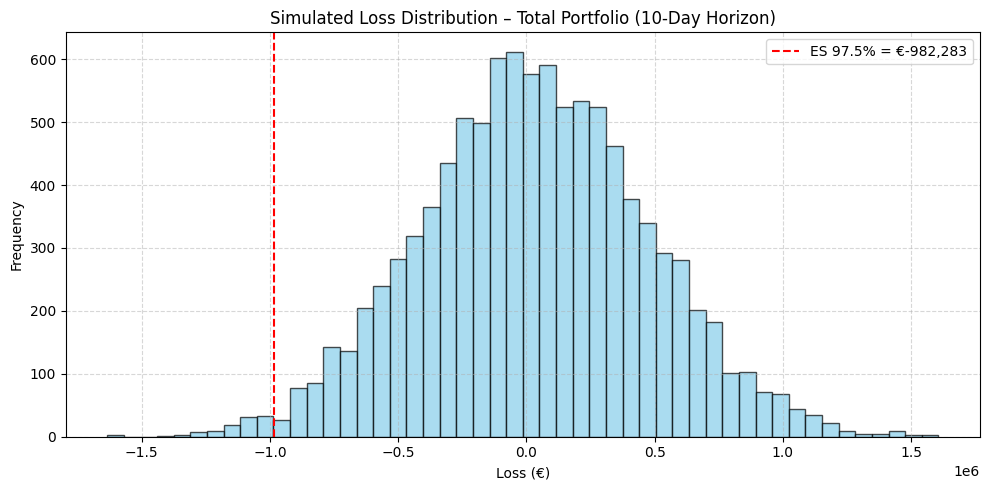

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIGURATION ===
np.random.seed(42)  # For reproducibility
simulations = 10000
T_days = 10
multiplier = 1.5
annual_trading_days = 252

# === PORTFOLIO ASSUMPTIONS ===
portfolio = {
    "Equity Future": {"notional": 7_000_000, "vol": 0.25},
    "Government Bond": {"notional": 10_000_000, "vol": 0.05},
    "Corporate Bond": {"notional": 5_000_000, "vol": 0.07},
    "FX Forward": {"notional": 4_000_000, "vol": 0.20},
    "Oil Future": {"notional": 3_000_000, "vol": 0.30}
}

# === SIMULATE LINEAR INSTRUMENTS ===
total_linear_pnl = np.zeros(simulations)

for instrument, data in portfolio.items():
    vol_10d = data["vol"] * np.sqrt(T_days / annual_trading_days)
    returns = np.random.normal(0, vol_10d, simulations)
    pnl = data["notional"] * returns
    total_linear_pnl += pnl

# === SIMULATE EQUITY CALL OPTION ===
S = 100
K = 105
sigma = 0.2
option_price = 36_000
notional = 2_000_000

sigma_10d_option = sigma * np.sqrt(T_days / annual_trading_days)
returns_option = np.random.normal(0, sigma_10d_option, simulations)
prices_10d = S * np.exp(returns_option)

# Option payoff and P&L
payoff = np.maximum(prices_10d - K, 0)
option_pnl = (payoff * (notional / S)) - option_price

# === COMBINE TOTAL PORTFOLIO P&L ===
total_pnl = total_linear_pnl + option_pnl

# === CALCULATE EXPECTED SHORTFALL (97.5%) ===
def expected_shortfall(pnl_array):
    losses = -pnl_array
    losses_sorted = np.sort(losses)
    cutoff = int(0.025 * simulations)
    return losses_sorted[:cutoff].mean()

es_option = expected_shortfall(option_pnl)
es_portfolio = expected_shortfall(total_pnl)

# === APPLY MULTIPLIER ===
capital_option = es_option * multiplier
capital_portfolio = es_portfolio * multiplier

# === OUTPUT ===
df = pd.DataFrame({
    "Instrument": ["Equity Call Option", "Total Portfolio"],
    "Expected Shortfall (97.5%, 10d)": [round(es_option, 2), round(es_portfolio, 2)],
    "IMA Capital (x1.5)": [round(capital_option, 2), round(capital_portfolio, 2)]
})

print("\n📊 IMA Capital Requirements from Simulations:")
print(df.to_string(index=False))

# === OPTIONAL PLOT ===
plt.figure(figsize=(10, 5))
plt.hist(-total_pnl, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(es_portfolio, color='red', linestyle='--', label=f"ES 97.5% = €{es_portfolio:,.0f}")
plt.title("Simulated Loss Distribution – Total Portfolio (10-Day Horizon)")
plt.xlabel("Loss (€)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show() 


## 🧮 Internal Model Approach (IMA) – Capital Requirement Summary

Under the **Internal Model Approach (IMA)**, the firm is required to hold **€1,473,425.15** in regulatory capital to cover potential market losses, based on the following parameters:

- ✅ **97.5% confidence level**
- 📅 **10-day liquidity horizon**
- 📊 **Capital multiplier of 1.5** applied to the calculated **Expected Shortfall (ES)**

This capital requirement reflects the firm’s exposure to **market risk** across its **entire trading book**, including:

- Equity
- Interest Rates
- Foreign Exchange (FX)
- Commodities
- Non-linear exposures such as the **Equity Call Option**